# IT402 Soft Computing Lab

Submitted by: Harsh Agarwal (181IT117)

### Importing the libraries

In [2]:
from math import exp        
import pandas as pd
import numpy as np

### Setting the max no. of iterations and Threshold value

In [3]:
MAX_ITERS=50
THRESHOLD=0.5

### Reading the dataset

In [6]:
df=pd.read_csv('heart.csv')
class_values=np.unique(df['target'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Shuffling the dataset tuples

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
1,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
2,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
3,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
4,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
299,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
300,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
301,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


### Normalizing the dataset values

In [9]:
class_label=df['target']
df=(df-df.mean())/df.std()
df=df.assign(target=class_label)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.170837,0.679881,-0.936965,0.192508,0.149255,-0.416945,-1.004171,-0.988723,-0.69548,1.516178,-0.648041,0.264644,1.121174,0
1,-1.361616,-1.465992,1.000921,-0.662770,-0.718956,-0.416945,0.897478,1.019558,-0.69548,-0.895381,-0.648041,-0.713249,-0.512075,1
2,0.289984,0.679881,-0.936965,-0.092585,-2.223854,-0.416945,0.897478,-1.512623,1.43311,0.138144,-0.648041,0.264644,1.121174,0
3,1.060731,0.679881,1.000921,-0.377678,1.210401,-0.416945,0.897478,-0.814090,1.43311,0.654907,-0.648041,-0.713249,1.121174,0
4,-0.040336,0.679881,0.031978,3.442567,0.708768,-0.416945,-1.004171,1.980040,-0.69548,-0.895381,0.974740,0.264644,1.121174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.501157,0.679881,1.000921,-0.776808,0.593007,-0.416945,0.897478,0.059076,-0.69548,-0.034110,0.974740,0.264644,1.121174,1
299,0.069771,0.679881,-0.936965,0.477601,-0.564607,-0.416945,0.897478,-1.687256,1.43311,3.927736,-2.270822,-0.713249,1.121174,0
300,0.179877,-1.465992,-0.936965,0.135490,3.139757,-0.416945,-1.004171,0.015417,1.43311,0.741034,-0.648041,1.242538,1.121174,0
301,0.069771,-1.465992,-0.936965,-0.206622,-0.796130,-0.416945,2.799126,-0.857748,1.43311,0.827161,-0.648041,0.264644,1.121174,0


### Defining Class for Neuron and Neural Network with functions

In [10]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights=weights
        self.bias=bias
        
        
    def output(self, inputs):
        y=self.bias
        y+=sum(w*ip for w,ip in zip(self.weights, inputs))
        return 1/(1+exp(-y))
    
    def update(self, l_rate, error, outputs):
        # Update bias value
        self.bias=self.bias+l_rate*error
        
        # Update weights value
        for i in range(len(self.weights)):
            self.weights[i]=self.weights[i]+l_rate*error*outputs[i]

In [11]:
class Network:
    def __init__(self,weights,biases):
        self.weights=weights # 3D array
        self.biases=biases # 2D array
        self.outputs=[[0 for _ in range(len(weights[i]))] for i in range(len(weights))]+[[0 for _ in range(len(biases[-1]))]]
        self.errors=[[0 for _ in range(len(weights[i]))] for i in range(len(weights))]+[[0 for _ in range(len(biases[-1]))]]
        self.actual=0
        self.neurons=[]
        for i,l_biases in enumerate(biases):
            n=[]
            for j, bias in enumerate(l_biases):
                wts=[wt[j] for wt in weights[i]]
                n.append(Neuron(wts, bias))
            self.neurons.append(n)

    def feed_forward(self, inp):
        X=inp[:-1]
        self.actual=inp[-1]
        self.outputs[0]=X
        for layer,neurons in enumerate(self.neurons):
            op=[]
            for neuron in neurons:
                op.append(neuron.output(self.outputs[layer]))
            self.outputs[layer+1]=op
        return op[0]
    
    def back_propagate(self, l_rate):
        last=True
        for layer in range(len(self.outputs)-1,0,-1):
            for i in range(len(self.neurons[layer-1])):
                op=self.outputs[layer][i]
                op_prev=self.outputs[layer-1]
                error=op*(1-op)
                if last:
                    error*=(self.actual-op)
                else:
                    error*=sum(self.errors[layer+1])
                self.neurons[layer-1][i].update(l_rate, error, op_prev)
                self.errors[layer][i]=error
            last=False
    
    def train(self, dataset):
        for epoch in range(MAX_ITERS):
            for row in dataset:
                self.feed_forward(row)
                self.back_propagate(l_rate=1/(epoch+1))
                
    def output(self, inp):
        return self.feed_forward(inp)        

### Assigning weights and biases as given in ques

In [12]:
n=len(df)
weights=[]
weights.append([[1/(n*5) for _ in range(5)] for _ in range(len(df.columns)-1)])
weights.append([[1/5] for _ in range(5)])

biases=[]
biases.append([1/6 for _ in range(5)])
biases.append([1/6])

### Performing 10 Fold Cross Validation

In [33]:
skip=len(df)//10
init=0
n=len(df)
weights=[]
weights.append([[1/(n*5) for _ in range(5)] for _ in range(len(df.columns)-1)])
weights.append([[1/5] for _ in range(5)])

biases=[]
biases.append([1/6 for _ in range(5)])
biases.append([1/6])

class_count=len(class_values)
conf_matrix = pd.DataFrame(np.zeros((class_count,class_count), dtype='int'), index = class_values, columns = class_values)\
.rename_axis('Predicted')\
.rename_axis('Actual', axis="columns").T

for _ in range(10):
    test=df[init:init+skip].to_numpy()
    train=df.drop(range(init,init+skip)).to_numpy()
    init+=skip
    
    network=Network(weights=weights, biases=biases)
    network.train(train)
    for row in test:
        X=row[:-1]
        actual=row[-1]
        pred=network.output(row)
        pred=0 if pred<THRESHOLD else 1
        conf_matrix[pred][actual]+=1
df_confusion=conf_matrix
df_confusion

Predicted,0,1
Actual,,
0,108,27
1,21,144


In [34]:
total_tp=0
total_recall=0
total_precision=0
total_f1=0

for class_type in class_values:
    TP=df_confusion.loc[class_type][class_type]
    FN=sum(df_confusion.loc[class_type , : ])-TP
    FP=sum(df_confusion[class_type])-TP
    TN=df_confusion.values.sum()-(TP+FN+FP)

    precision=TP/(FP+TP)
    recall=TP/(TP+FN)
    f1=2*precision*recall/(precision+recall)

    total_recall+=recall
    total_precision+=precision
    total_f1+=f1
    total_tp+=TP


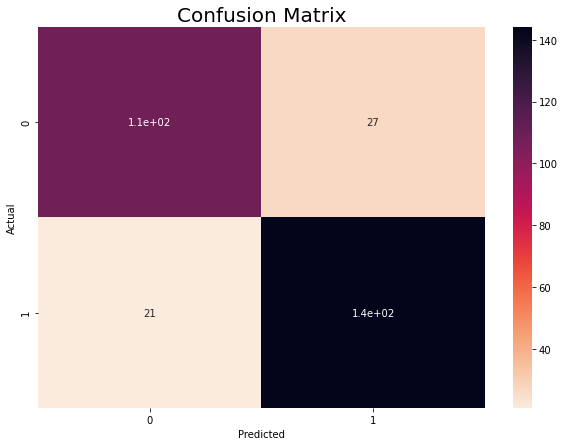

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True, cmap=sn.cm.rocket_r)
plt.show()

In [36]:
accuracy=100*total_tp/df_confusion.values.sum()
print("\nAvg Accuracy: {}%".format(round(accuracy,4)))
print("Avg precision: {}".format(round(total_precision/len(class_values),4)))
print("Avg recall: {}".format(round(total_recall/len(class_values),4)))
print("Avg f1 score: {}".format(round(total_f1/len(class_values),4)))


Avg Accuracy: 84.0%
Avg precision: 0.8397
Avg recall: 0.8364
Avg f1 score: 0.8377
